In [43]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 1/(1 + np.exp(-x))
g = lambda x: 1.0/(1.0+x**2)
h = lambda x: np.sin(x)

x_observed = np.linspace(-10, 10, 11) # 観測点

fx_observed = f(x_observed) # f(x) の観測値
gx_observed = g(x_observed) # g(x) の観測値
hx_observed = h(x_observed) # h(x) の観測値

x_latent = np.linspace(-10, 10, 101)

# 課題82

In [48]:
# 完全に先生のコードを写しました
# この部分は提出しなくてもよかった
def spline(x,x_observed,y_observed):
  n = len(x_observed) - 1 # 何個の3次式を定義するか
  A = np.zeros((4 * n, 4 * n)) 
  b = np.zeros(4 * n)
  for i in range(n - 1):
    A[4 * i][4 * i + 0] = x_observed[i] ** 3
    A[4 * i][4 * i + 1] = x_observed[i] ** 2
    A[4 * i][4 * i + 2] = x_observed[i]
    A[4 * i][4 * i + 3] = 1
    b[4 * i] = y_observed[i]

    A[4 * i + 1][4 * i + 0] = x_observed[i + 1] ** 3
    A[4 * i + 1][4 * i + 1] = x_observed[i + 1] ** 2
    A[4 * i + 1][4 * i + 2] = x_observed[i + 1]
    A[4 * i + 1][4 * i + 3] = 1
    b[4 * i + 1] = y_observed[i + 1]

    A[4 * i + 2][4 * i + 0] = 3 * x_observed[i + 1] ** 2
    A[4 * i + 2][4 * i + 1] = 2 * x_observed[i + 1] 
    A[4 * i + 2][4 * i + 2] = 1
    A[4 * i + 2][4 * i + 4] = -3 * x_observed[i + 1] ** 2
    A[4 * i + 2][4 * i + 5] = -2 * x_observed[i + 1] 
    A[4 * i + 2][4 * i + 6] = -1 

    A[4 * i + 3][4 * i + 0] = 6 * x_observed[i + 1]
    A[4 * i + 3][4 * i + 1] = 2
    A[4 * i + 3][4 * i + 4] = -6 * x_observed[i + 1]
    A[4 * i + 3][4 * i + 5] = -2 
  
  A[4 * n - 4][4 * n - 4] = x_observed[n - 1] ** 3
  A[4 * n - 4][4 * n - 3] = x_observed[n - 1] ** 2
  A[4 * n - 4][4 * n - 2] = x_observed[n - 1]
  A[4 * n - 4][4 * n - 1] = 1 
  b[4 * n -4] = y_observed[n - 1]

  A[4 * n - 3][4 * n - 4] = x_observed[n] ** 3
  A[4 * n - 3][4 * n - 3] = x_observed[n] ** 2
  A[4 * n - 3][4 * n - 2] = x_observed[n]
  A[4 * n - 3][4 * n - 1] = 1 
  b[4 * n - 3] = y_observed[n]

  A[4 * n - 2][0] = 6 * x_observed[0]
  A[4 * n - 2][1] = 2

  A[4 * n - 1][4 * n - 4] = 6 * x_observed[n]
  A[4 * n - 1][4 * n - 3] = 2

  coeff = np.linalg.solve(A,b)
  return coeff

In [49]:
spline([0],x_observed,fx_observed)

array([-2.03125651e-05, -6.09376952e-04, -5.86754313e-03, -1.80049033e-02,
        3.32477921e-04,  7.85759471e-03,  6.18682302e-02,  1.62623826e-01,
        1.31525008e-04,  4.24044229e-03,  4.01653156e-02,  1.19217996e-01,
        8.18227348e-03,  1.00849424e-01,  4.26601242e-01,  6.34465899e-01,
       -8.62596384e-03, -4.16333634e-17,  2.24902394e-01,  5.00000000e-01,
       -8.62596384e-03, -4.16333634e-17,  2.24902394e-01,  5.00000000e-01,
        8.18227348e-03, -1.00849424e-01,  4.26601242e-01,  3.65534101e-01,
        1.31525008e-04, -4.24044229e-03,  4.01653156e-02,  8.80782004e-01,
        3.32477921e-04, -7.85759471e-03,  6.18682302e-02,  8.37376174e-01,
       -2.03125651e-05,  6.09376952e-04, -5.86754313e-03,  1.01800490e+00])

ここまでで授業内の数値と整合した。（ほっとした）
計算を続けていく。

In [50]:
# 完全に先生のコードを写しました
# こちらが提出用
def spline(x,x_observed,y_observed):
  n = len(x_observed) - 1 # 何個の3次式を定義するか
  A = np.zeros((4 * n, 4 * n)) 
  b = np.zeros(4 * n)
  for i in range(n - 1):
    A[4 * i][4 * i + 0] = x_observed[i] ** 3
    A[4 * i][4 * i + 1] = x_observed[i] ** 2
    A[4 * i][4 * i + 2] = x_observed[i]
    A[4 * i][4 * i + 3] = 1
    b[4 * i] = y_observed[i]

    A[4 * i + 1][4 * i + 0] = x_observed[i + 1] ** 3
    A[4 * i + 1][4 * i + 1] = x_observed[i + 1] ** 2
    A[4 * i + 1][4 * i + 2] = x_observed[i + 1]
    A[4 * i + 1][4 * i + 3] = 1
    b[4 * i + 1] = y_observed[i + 1]

    A[4 * i + 2][4 * i + 0] = 3 * x_observed[i + 1] ** 2
    A[4 * i + 2][4 * i + 1] = 2 * x_observed[i + 1] 
    A[4 * i + 2][4 * i + 2] = 1
    A[4 * i + 2][4 * i + 4] = -3 * x_observed[i + 1] ** 2
    A[4 * i + 2][4 * i + 5] = -2 * x_observed[i + 1] 
    A[4 * i + 2][4 * i + 6] = -1 

    A[4 * i + 3][4 * i + 0] = 6 * x_observed[i + 1]
    A[4 * i + 3][4 * i + 1] = 2
    A[4 * i + 3][4 * i + 4] = -6 * x_observed[i + 1]
    A[4 * i + 3][4 * i + 5] = -2 
  
  A[4 * n - 4][4 * n - 4] = x_observed[n - 1] ** 3
  A[4 * n - 4][4 * n - 3] = x_observed[n - 1] ** 2
  A[4 * n - 4][4 * n - 2] = x_observed[n - 1]
  A[4 * n - 4][4 * n - 1] = 1 
  b[4 * n -4] = y_observed[n - 1]

  A[4 * n - 3][4 * n - 4] = x_observed[n] ** 3
  A[4 * n - 3][4 * n - 3] = x_observed[n] ** 2
  A[4 * n - 3][4 * n - 2] = x_observed[n]
  A[4 * n - 3][4 * n - 1] = 1 
  b[4 * n - 3] = y_observed[n]

  A[4 * n - 2][0] = 6 * x_observed[0]
  A[4 * n - 2][1] = 2

  A[4 * n - 1][4 * n - 4] = 6 * x_observed[n]
  A[4 * n - 1][4 * n - 3] = 2

  coeff = np.linalg.solve(A,b)

  interpolated  = []
  for x in x_latent:
    for j in range(len(x_observed) - 1):
      if x_observed[j] <= x and x <= x_observed[j + 1]:
        a = coeff[4 * j]
        b = coeff[4 * j + 1]
        c = coeff[4 * j + 2]
        d = coeff[4 * j + 3]
        y = a * x ** 3 + b * x ** 2 + c * x + d
        interpolated.append(y)
        break


  return interpolated
    

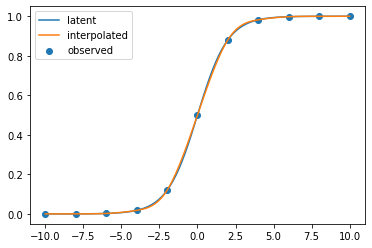

In [51]:
plt.scatter(x_observed, fx_observed, label = "observed")
plt.plot(x_latent,f(x_latent),label = "latent")
plt.plot(x_latent,spline(x_latent,x_observed,fx_observed),label = "interpolated")
plt.legend()

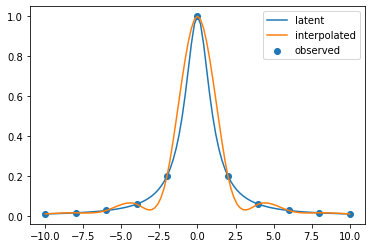

In [52]:
plt.scatter(x_observed, gx_observed, label = "observed")
plt.plot(x_latent,g(x_latent),label = "latent")
plt.plot(x_latent,spline(x_latent,x_observed,gx_observed),label = "interpolated")
plt.legend()

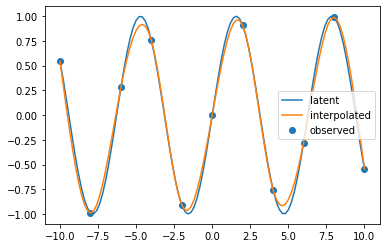

In [53]:
plt.scatter(x_observed, hx_observed, label = "observed")
plt.plot(x_latent,h(x_latent),label = "latent")
plt.plot(x_latent,spline(x_latent,x_observed,hx_observed),label = "interpolated")
plt.legend()